In [2]:
### REQUIRED IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

<h2><center> 1. First Posterior PDF </h2>

### Goals

**1. Understand and implement in code the following components of Bayesian Inference**

    1. Prior Distribution
    2. Sampling Function / Likelihood
    3. Posterior Distribution

**2. Define each component for our toy example: Measuring Phil's Height.**

**3. Visualize the result of assigning a prior, observing/measuring data and updating our belief to the posterior distribution.** 


### Example Scenario
We want to measure Phil's height. Before making any measurements, we think his height is `182 cm +/- 12.7 cm` (the 12.7cm comes from 5in uncertainty on an estimated height of 6ft!). We then make three **independent** measurements of his height and record `190`, `200`, and `195`. In this notebook, we want to understand and visualize how we can arrive at a <u>final probability distribution function (PDF)</u> describing Phil's height or the <u>Posterior PDF</u>, using the provided information.

In [3]:
measurements = np.array([190, 195, 200])

### Bayes Theorem

###### move this down
`Explain why we're using Bayes - how to get posterior given prior and prob of getting data.`

Bayes' Theorem is a  theorem describes the probability of an event, based on prior information. The formula is a follows:

$$ P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)} $$


Where:
- $ P(A|B) $ is the posterior probability: the probability of event $ A $ occurring given that $ B $ is true.
- $ P(B|A) $ is the likelihood: the probability of event $ B $ occurring given that $ A $ is true.
- $ P(A) $ is the prior probability: the initial probability of event $ A $ occurring, irrespective of $ B $.
- $ P(B) $ is the marginal probability: the total probability of event $ B $ occurring.


### Prior Assumptions

We assume that the height is distributed as a Gaussian with a mean of `182` with a standard deviation of `12.7`.

In [78]:
### In this cell, implement the prior assumption as a function, 
### We can use this function when we later compute the posterior PDF
# Define the prior PDF function
def prior_pdf(x):
    mean_height = 182  # in cm
    std_dev = 12.7  # in cm
    pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_height) / std_dev) ** 2)
    return pdf



### Likelihood

`Outline the functional form for the likelihood. Describe what assumptions we're making about our likelihood. Derive the analytical description for the likelihood given our 3 datapoints.`

The sampling distribution of $i^{th}$ observed data point ($D_i$) given parameter ($\theta$) is:
$$ P(D_i | \theta) = \frac{1}{\sqrt{2\pi} \sigma} \exp{\frac{-(D_i - \theta)^2}{2\sigma^2}}$$
$$ P(D | \theta) = \prod_i P(D_i | \theta) $$

Product because D_i are independent 
`change: We make our measurements with some uncertainty -- this is $\sigma$ and assign it a value of 10.`

##### measurement is an inference, observation is a fixed unchaing things coming out of device (meter stick)

In [79]:
### In this cell, implement the likelihood function given our three observations
### We can use this function when we later compute the posterior PDF
measurement_uncertainty = 5
def likelihood(measurements, theta):
    std_dev_measurement = measurement_uncertainty
    likelihoods = np.array([(1 / (std_dev_measurement * np.sqrt(2 * np.pi))) * 
                            np.exp(-0.5 * ((measurement - theta) / std_dev_measurement) ** 2)
                            for measurement in measurements])
    return np.prod(likelihoods, axis=0)




### Posterior Distribution

`Describe what the posterior is and outline any assumptions made.`

The posterior PDF folds in information from our prior assumptions AND our observations. It is our updated understanding of Phil's height, after making three measurements. This will also be distributed as a Gaussian given that our prior and likelihood functions are Gaussians. 

$$ posterior \propto likelihood \times prior$$
$$ P(\theta \mid D) = \frac{P(D \mid \theta) \cdot P(\theta)}{P(D)} $$

In [80]:
### Implement a function to obtain the Posterior PDF
def posterior_pdf(data, prior_function, likelihood_function, theta_values):
    prior_values = prior_function(theta_values)
    likelihood_values = np.array([likelihood_function(data, theta) for theta in theta_values])
    unnormalized_posterior = likelihood_values * prior_values
    posterior = unnormalized_posterior / np.trapz(unnormalized_posterior, theta_values)  # Normalize using trapezoidal rule
    return posterior




##### Overlay the following curves: 
1. the `prior PDF`, 
2. the `likelihood of each datapoint` (3 curves), 
3. the `posterior PDF`

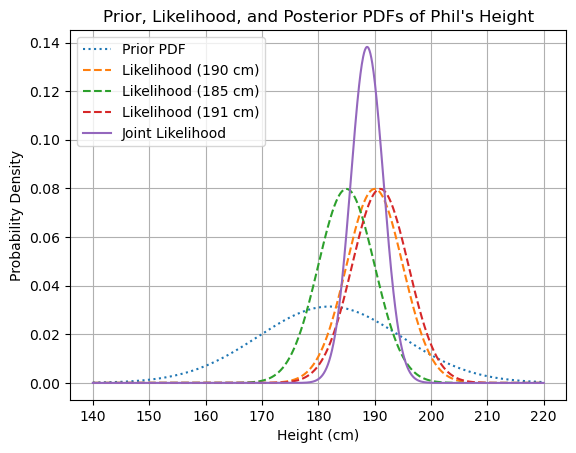

In [86]:
### Overlay the following curves: 1. the Likelihood of each datapoint (3 individual curves), 
### 2. the Likelihood of all datapoints (this is the joint probability of observing all 3 datapoints), 

# Given measurements
measurements = [190, 185, 191]

# Define the range of theta values (Phil's height)
theta_values = np.linspace(140, 220, 1000)

# Compute the posterior PDF
posterior = posterior_pdf(measurements, prior_pdf, likelihood, theta_values)

# Visualize the prior distribution
plt.plot(theta_values, prior_pdf(theta_values), label='Prior PDF', linestyle='dotted')

# Visualize the likelihood curves for each data point
for measurement in measurements:
    one_measure_lik = np.array([likelihood([measurement], theta) for theta in theta_values])
    one_measure_like_norm = one_measure_lik / np.trapz(one_measure_lik, theta_values)
    plt.plot(theta_values, one_measure_like_norm, label=f'Likelihood ({measurement} cm)', linestyle='--')

# Compute the joint likelihood for all measurements
joint_likelihood = np.array([likelihood(measurements, theta) for theta in theta_values])
joint_likelihood /= np.trapz(joint_likelihood, theta_values)

# Visualize the joint likelihood
plt.plot(theta_values, joint_likelihood, label='Joint Likelihood')



# Set plot labels and legend
plt.xlabel("Height (cm)")
plt.ylabel("Probability Density")
plt.title("Prior, Likelihood, and Posterior PDFs of Phil's Height")
plt.legend()
plt.grid(True)
plt.show()



##### Overlay the following curves: 
1. the `prior PDF`, 
2. the `joint likelihood` of our observations,
3. the `posterior PDF`

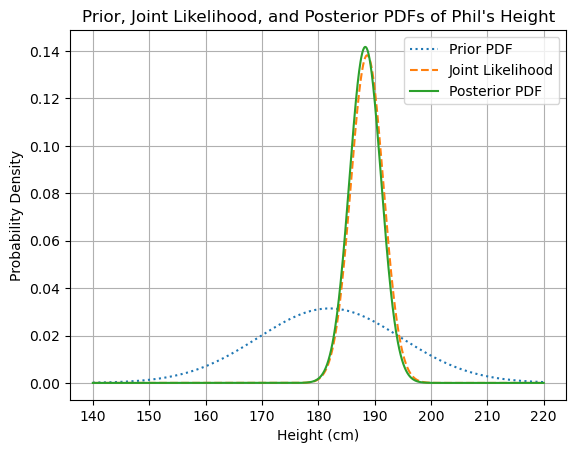

In [85]:
# Given measurements
measurements = [190, 185, 191]

# Define the range of theta values (Phil's height)
theta_values = np.linspace(140, 220, 1000)

# Compute the posterior PDF
posterior = posterior_pdf(measurements, prior_pdf, likelihood, theta_values)

# Visualize the prior distribution
plt.plot(theta_values, prior_pdf(theta_values), label='Prior PDF', ls = 'dotted')

# Visualize the joint likelihood
# plt.plot(theta_values, joint_likelihood, )
plt.plot(theta_values, joint_likelihood, label='Joint Likelihood', linestyle='--')
# Visualize the posterior PDF
plt.plot(theta_values, posterior, label='Posterior PDF', )


# Set plot labels and legend
plt.xlabel("Height (cm)")
plt.ylabel("Probability Density")
plt.title("Prior, Joint Likelihood, and Posterior PDFs of Phil's Height")
plt.legend()
plt.grid(True)

### Summarizing Our Results
* We have now overlayed the Prior PDF, joint likelihood and the posterior pdf as blue, orange and green respectively. The prior pdf has a large spread because recall we set the mean to be centered at 182 with a standard deviation of 12.7; this is to show how uncertain we are about our measurement. However, you also might notice the small shift between the jointliklihood and the posterior pdf. Why is that so? 
* You might expect the joint liklihood to be exactly the same, but the posterior pdf folds all of our information about the measurements. Meaning that not only are we using the liklihood but we are also accounting for the uncertainty around the our mean which means the posterior will also be weighted closer towards the prior. 



## Compute the median of the posterior distribution

* Another interesting metric is the Median of the posterior distribution. 
* Ordinarily, you can compute the median by integrating to .5 of prob mass (integral under posterior pdf). You can derive a width also doing the same integral, if you do the same to .16 of the mass or keep integrating until you have 84 percent of prob mass now you have values at the 84th percentile and 16th percentile. The amount of prob mass between the 16th perc and 84 percent is 68 percent. This is interesting because if you take a gauss function and ask what probability lies within 1sig with the mean the answer is 68 percent. When you summ posterior pdf you compute the median and a ccredible interval so you get the 68th percent credible interval. (median +/- x where is half of the 68th cred interval)

In [91]:
def compute_median(theta_values, posterior_pdf):
    cumulative_distribution = np.cumsum(posterior_pdf) / np.sum(posterior_pdf)
    median_index = np.searchsorted(cumulative_distribution, 0.5)
    return theta_values[median_index]

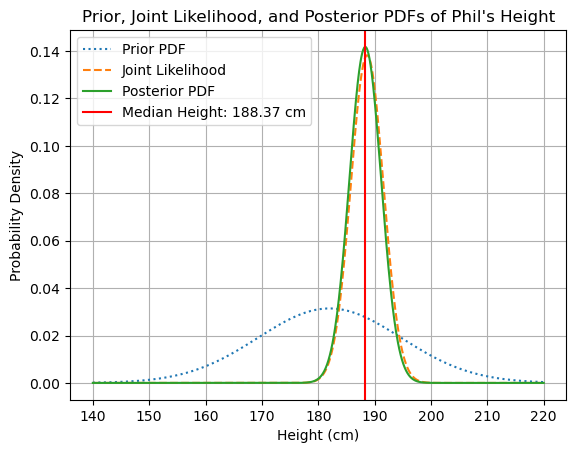

In [92]:


# Given measurements
measurements = [190, 185, 191]

# Define the range of theta values (Phil's height)
theta_values = np.linspace(140, 220, 1000)

# Compute the posterior PDF
posterior = posterior_pdf(measurements, prior_pdf, likelihood, theta_values)

# Compute the median of the posterior distribution
median_height = compute_median(theta_values, posterior)

# Visualize the prior distribution
plt.plot(theta_values, prior_pdf(theta_values), label='Prior PDF', linestyle='dotted')

# Visualize the likelihood curves for each data point
joint_likelihood = np.array([likelihood(measurements, theta) for theta in theta_values])
joint_likelihood /= np.trapz(joint_likelihood, theta_values)

# Visualize the joint likelihood
plt.plot(theta_values, joint_likelihood, label='Joint Likelihood', linestyle='--')

# Visualize the posterior PDF
plt.plot(theta_values, posterior, label='Posterior PDF')

# Plot the median
plt.axvline(median_height, color='r', linestyle='-', label=f'Median Height: {median_height:.2f} cm')

# Set plot labels and legend
plt.xlabel("Height (cm)")
plt.ylabel("Probability Density")
plt.title("Prior, Joint Likelihood, and Posterior PDFs of Phil's Height")
plt.legend()
plt.grid(True)
plt.show()

* The plot above shows that by intergrating we calculate the median value to be about 188


#### Extra Notes:
* Because we know the gaussian is symmetric compute mean and get a central value, posterior mean is often a good summary statistic. If the distribution is skewed posterior mean is not necessarily a good statistic.

* To find mode, draw samples from distribution but in practice doesnt work!!!! Look at the most probable value which is the peak of the pdf this is where the probability density is highest. Because means areften skewed, modes are difficult to find, median is both well behaved and easy to calculate